<a href="https://colab.research.google.com/github/zama-sarib/ML-Implementation/blob/master/Random%20Search%20Hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=1000000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)
# del X_train,X_test

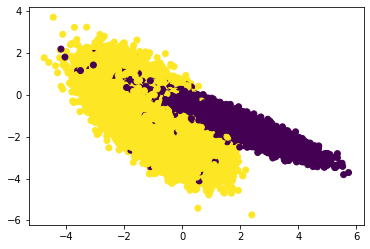

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [128]:
def randomly_select_indices_in_range_from_1_to_len(x_train,folds):
    fraction_size = 1/folds
    return random.sample(range(0, len(x_train)), int(fraction_size*len(x_train)))


def divideGroup(x_train,folds):
    test_indices = randomly_select_indices_in_range_from_1_to_len(x_train,folds)
    train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices))
    return train_indices,test_indices

def RandomSearchCV(x_train,y_train,classifier, params, folds):
    
    trainscores = []
    testscores  = [] 
    
    for k in tqdm(params):

        trainscores_folds = []
        testscores_folds  = []
    
        train_indices,test_index = divideGroup(x_train,folds)
        train_index = np.array_split(train_indices,folds-1)
        np.append(train_index,np.array(test_index))
    
        train = []
        test = []
        cross_val={'train': train, 'test': test}
        for i, testi in enumerate(train_index):
            train.append(train_index[:i]+train_index[i+1:])


            train_idx = np.ravel(np.array(cross_val['train']))
            test_idx = np.ravel(list(set(list(range(0, len(x_train)))) - set(train_idx)))
            # print(len(set(train_idx).intersection(set(test_idx))))
            X_train = x_train[train_idx]
            Y_train = y_train[train_idx]
            X_test  = x_train[test_idx]
            Y_test  = y_train[test_idx]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
 

        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))


    return trainscores,testscores



100%|██████████| 10/10 [09:39<00:00, 57.93s/it]

[0.947807, 0.948231, 0.9496439999999999, 0.9477089999999999, 0.94655, 0.949419, 0.946107, 0.946566, 0.947424, 0.945921] [0.9422200000000001, 0.941467, 0.941098, 0.942463, 0.943797, 0.939952, 0.944055, 0.943667, 0.942755, 0.94438]


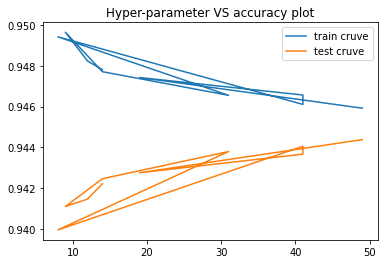

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

def randomParam(params_range):
    return np.random.randint(params_range[0],params_range[1],10)

neigh = KNeighborsClassifier()

params_range = (1,50)
params = randomParam(params_range)
folds = 3

trainscores,testscores = RandomSearchCV(X_train, y_train, neigh, params, folds)
print(trainscores,testscores)
# trainscores, trainscores = zip(*sorted(zip(trainscores,trainscores)))
plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [130]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

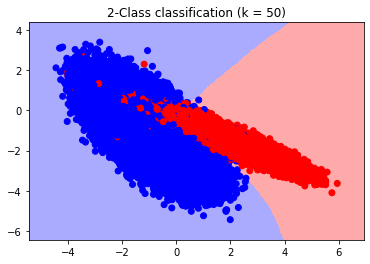

In [132]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 50)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)